# Plotting for Exploratory Data Analysis

__Exploratory Data Analysis__ (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

## Iris Flower Dataset

* A simple dataset to learn the basics.
* 3 Flower of Iris species.
* 1936 samples of data by Ronald Fisher
* Petal and Sepal

### Objective: 
    Classify a new flower as belonging to one of the 3 classes give the 4 features.

For EDA, we are basically concerned with:
1. Importance of Domain Knowledge.
2. Why use petal and sepal dimensions as features?
3. Why do we not use 'color' as a feature?
    

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Load Iris.data into pandas dataframe
iris = pd.read_csv("iris.data")

In [10]:
# (Q): How many data-sample/observations and features are there?
print(iris.shape)

(149, 5)


In [11]:
# We provide the column names if not provided (Read dataset description from the Source)
iris.columns=["sepal_length", 'sepal_width', 'petal_length', 'petal_width', 'species']

# (Q) What are the column names in our dataset?
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [15]:
# (Q) How many observations are there for each class?
# How many flowers are there for each species?
iris['species'].value_counts()

# balanced-dataset vs imbalanced dataset
# Iris is a balanced dataset as the number of observations for each classes is equal

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        49
Name: species, dtype: int64

# 2D Scatter Plot

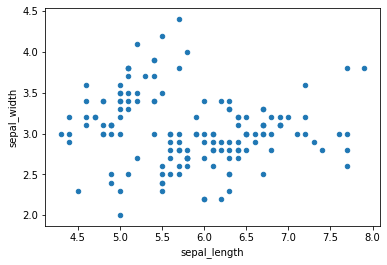

In [18]:
# 2-D scatter plot:
# Always understand the axis: labels and scale

iris.plot(kind='scatter', x='sepal_length', y='sepal_width')
plt.show()

# cannot make much sense out of it.
# what if we color the points by their class-label/flower-type

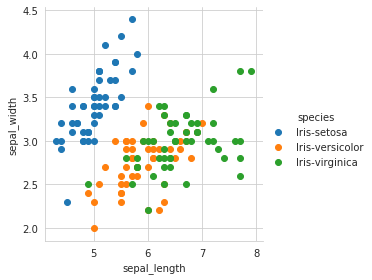

In [21]:
# 2-D Scatter plot with color-coding for each flower type/class
# Here 'sns' corresponds to seaborn
sns.set_style("whitegrid")
sns.FacetGrid(
    iris, 
    hue="species", 
    size=4).map(
        plt.scatter, "sepal_length", "sepal_width"
    ).add_legend()
plt.show()

# Notice that the blue data points can be easily separated from orange and green
# by drawing a line. But orange and green data points cannot be easily separated.
# Can we draw multiple 2-D scatter plot for each combination of features?  
# How many combination exists? 4C2 = 6

__Observation(s)__:

1. Using speal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Virginica is much harder as they have considerable overlap.

# Pair-plot

/home/ashish/.virtualenvs/ai_venv/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


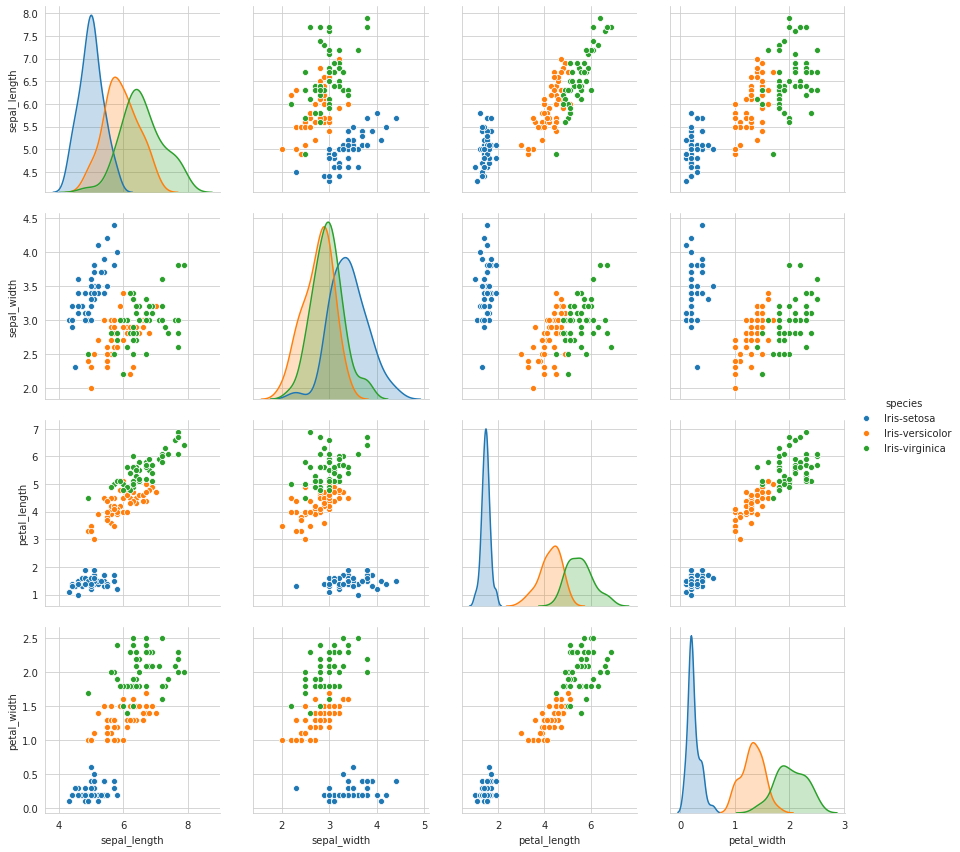

In [22]:
# pairwise scatter plot: Pair-Plot
# Disadvantage:
# Can be used when number of features are high
# cannot visualize higher dimensional patterns in 3-D and 4D
# only possible to view 2D patterns.

plt.close()
sns.set_style("whitegrid")
sns.pairplot(iris, hue="species", size=3)
plt.show()
# Note: the diagonal elements are Probability Density Function
# for each features.

__Observations:__
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flow